In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import csv

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
MY_PATH = '/content/drive/MyDrive/Simulation_data/data/analysis_data/ret81_ke/'

In [8]:
nu = 0.00020704166

In [9]:
df = pd.read_csv(MY_PATH + 'ret81_24_ke_z_10.csv')

In [10]:
df.head()

,z,wl,vl,ul,wh,vh,uh
0,0.000000,1.073516,0.000107,0.000002,0.012973,0.000359,0.000169
1,0.066406,1.073670,0.000046,0.000002,0.012897,0.000386,0.000202
2,0.132812,1.073862,0.000028,0.000003,0.012730,0.000465,0.000247
3,0.199219,1.074073,0.000080,0.000004,0.012440,0.000582,0.000249
4,0.265625,1.074270,0.000193,0.000003,0.012263,0.000649,0.000200


In [ ]:
df.describe()

,z,wl,vl,ul,wh,vh,uh
count,512.000000,512.000000,512.000000,5.120000e+02,512.000000,512.000000,512.000000
mean,16.966797,1.065968,0.000127,1.645569e-05,0.014102,0.000561,0.000219
std,9.824535,0.009249,0.000175,4.257300e-05,0.003558,0.000573,0.000297
min,0.000000,1.045614,0.000007,1.519158e-07,0.007122,0.000047,0.000015
25%,8.483398,1.057824,0.000030,1.411484e-06,0.012051,0.000148,0.000052
50%,16.966797,1.067913,0.000069,3.980976e-06,0.013263,0.000331,0.000111
75%,25.450195,1.073780,0.000142,1.360891e-05,0.015790,0.000798,0.000234
max,33.933594,1.081581,0.001434,4.942075e-04,0.024420,0.002891,0.002138


In [11]:
field = ['wl', 'vl', 'ul', 'wh', 'vh', 'wh']


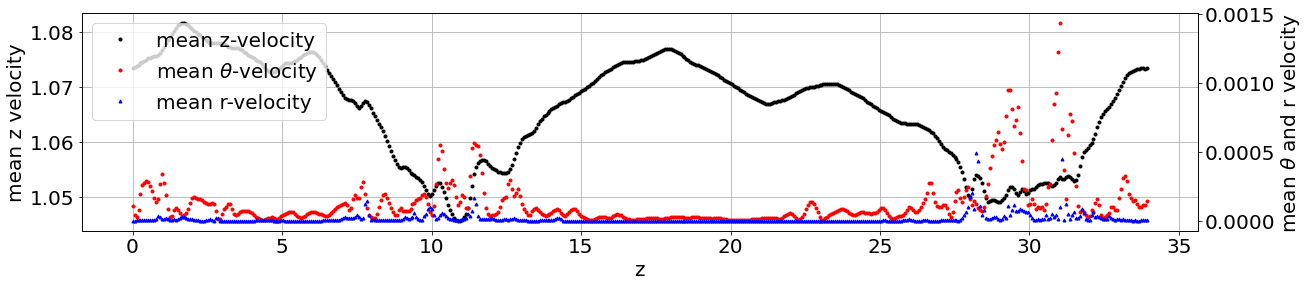

In [21]:
fig, ax = plt.subplots(figsize = (20,4))
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
# Plot linear sequence, and set tick labels to the same color
lns1 = ax.plot(df['z'], df['wl'], 'o', markersize = 3, color='k', label = 'mean z-velocity')
ax.tick_params(axis='y', labelcolor='k')
ax.set_xlabel('z')
ax.set_ylabel('mean z velocity')
plt.legend()
# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()
# Plot exponential sequence, set scale to logarithmic and change tick color
lns2 = ax2.plot(df['z'], df['vl'], 'o', markersize = 3, color='red',  label = r'mean $\theta$-velocity')
lns3 = ax2.plot(df['z'], df['ul'], '^', markersize = 3, color = 'blue', label = 'mean r-velocity')
ax2.tick_params(axis='y', labelcolor='k')
ax2.set_ylabel(r'mean $\theta$ and r velocity')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2)
ax.grid()
#plt.rcParams.update({'font.size': 15})
plt.show()


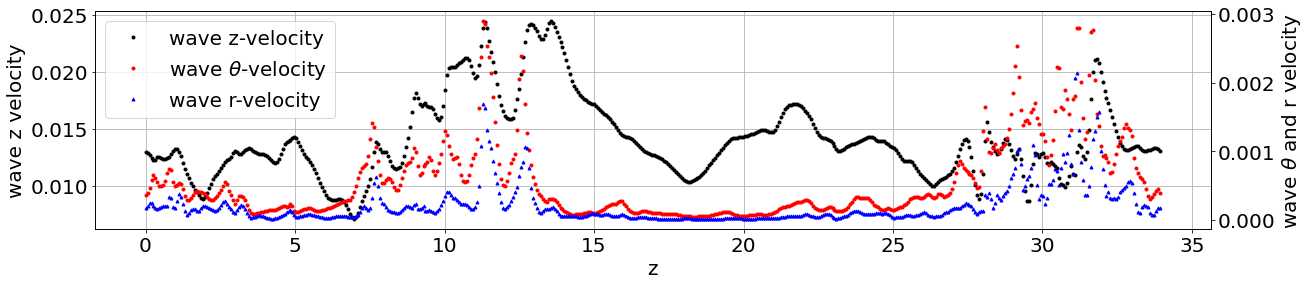

In [22]:
fig, ax = plt.subplots(figsize = (20,4))
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
# Plot linear sequence, and set tick labels to the same color
lns1 = ax.plot(df['z'], df['wh'], 'o', markersize = 3, color='k', label = 'wave z-velocity')
ax.tick_params(axis='y', labelcolor='k')
ax.set_xlabel('z')
ax.set_ylabel('wave z velocity')
plt.legend()
# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()
# Plot exponential sequence, set scale to logarithmic and change tick color
lns2 = ax2.plot(df['z'], df['vh'], 'o', markersize = 3, color='red',  label = r'wave $\theta$-velocity')
lns3 = ax2.plot(df['z'], df['uh'], '^', markersize = 3, color = 'blue', label = 'wave r-velocity')
ax2.tick_params(axis='y', labelcolor='k')
ax2.set_ylabel(r'wave $\theta$ and r velocity')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2)
ax.grid()
#plt.rcParams.update({'font.size': 15})
plt.show()


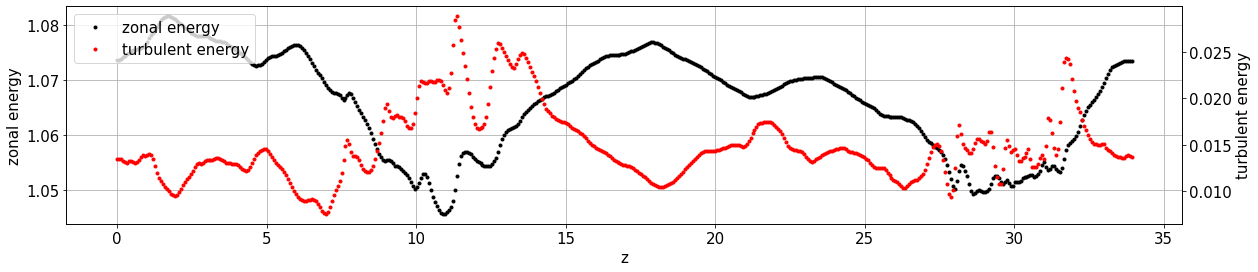

In [ ]:
fig, ax = plt.subplots(figsize = (20,4))
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 15
# Plot linear sequence, and set tick labels to the same color
lns1 = ax.plot(df['z'], df['wl'] + df['vl'] + df['ul'], 'o', markersize = 3, color='k', label = 'zonal energy')
ax.tick_params(axis='y', labelcolor='k')
ax.set_xlabel('z')
ax.set_ylabel('zonal energy')
plt.legend()
# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()
# Plot exponential sequence, set scale to logarithmic and change tick color
lns2 = ax2.plot(df['z'], df['wh'] + df['vh'] + df['uh'], 'o', markersize = 3, color='red',  label = 'turbulent energy')
#lns3 = ax2.plot(df['z'], df['ul'], '^', markersize = 3, color = 'blue', label = 'zonal r-velocity')
ax2.tick_params(axis='y', labelcolor='k')
ax2.set_ylabel('turbulent energy')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2)
ax.grid()
#plt.rcParams.update({'font.size': 15})
plt.show()


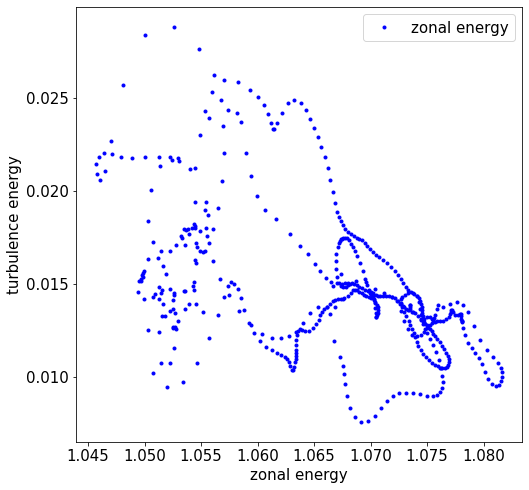

In [ ]:
zonal_energy = df['wl'] + df['vl'] + df['ul']
turb_energy = df['wh'] + df['vh'] + df['uh']
fig, ax = plt.subplots(figsize = (8,8))
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 15
# Plot linear sequence, and set tick labels to the same color
ax.plot(zonal_energy, turb_energy, 'o', markersize = 3, color='blue', label = 'zonal energy')
ax.tick_params(axis='y', labelcolor='k')
ax.set_xlabel('zonal energy')
ax.set_ylabel('turbulence energy')
plt.legend()
#plt.rcParams.update({'font.size': 15})
plt.show()
